# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import random
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE

In [25]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)

In [26]:
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [27]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

# Exercise 15.1

Estimate a Logistic Regression and a Decision Tree

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

# particionando base:

In [28]:
print(df.dtypes)
df.shape

accountAge                                        int64
digitalItemCount                                  int64
sumPurchaseCount1Day                              int64
sumPurchaseAmount1Day                           float64
sumPurchaseAmount30Day                          float64
paymentBillingPostalCode - LogOddsForClass_0    float64
accountPostalCode - LogOddsForClass_0           float64
paymentBillingState - LogOddsForClass_0         float64
accountState - LogOddsForClass_0                float64
paymentInstrumentAgeInAccount                   float64
ipState - LogOddsForClass_0                     float64
transactionAmount                               float64
transactionAmountUSD                            float64
ipPostalCode - LogOddsForClass_0                float64
localHour - LogOddsForClass_0                   float64
Label                                             int64
dtype: object


(138721, 16)

In [29]:
validation_size = 0.30
seed = 42
y=df.Label
x=df.iloc[:,0:(df.shape[1]-1)]

In [30]:
print(x.head())
print(y.head())
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=validation_size, random_state=seed)

   accountAge  digitalItemCount  sumPurchaseCount1Day  sumPurchaseAmount1Day  \
0        2000                 0                     0                   0.00   
1          62                 1                     1                1185.44   
2        2000                 0                     0                   0.00   
3           1                 1                     0                   0.00   
4           1                 1                     0                   0.00   

   sumPurchaseAmount30Day  paymentBillingPostalCode - LogOddsForClass_0  \
0                  720.25                                      5.064533   
1                 2530.37                                      0.538996   
2                    0.00                                      5.064533   
3                    0.00                                      5.064533   
4                  132.73                                      5.412885   

   accountPostalCode - LogOddsForClass_0  \
0                       

# Regresion logistica:

In [8]:
logreg = LogisticRegression(solver='lbfgs',max_iter =200) #cambio en parametros para lograr convergencia.
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
y_pred=logreg.predict(X_test)

In [10]:
metrics.accuracy_score(Y_test, y_pred) #ACCURACY

0.994112982675349

In [11]:
metrics.f1_score(Y_test, y_pred) #F1-SCORE

/Users/juand./anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [12]:
metrics.fbeta_score(Y_test, y_pred, beta=10) #F_BETA-SCORE

0.0

# Arbol de decisión:

In [13]:
from sklearn.tree import DecisionTreeClassifier

## tuneando max_depth para el arbol de clasificación:

In [14]:
# list of values to try
max_depth_range = range(1, 8)

# list to store the average RMSE for each value of max_depth
accuracys = []
salid=[]

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeClassifier(max_depth=depth, random_state=1)
    acc = cross_val_score(treereg, X_train, Y_train, cv=14, scoring='accuracy')
    tupla=(np.mean(acc),depth)
    salid.append(tupla)
    accuracys.append(np.mean(acc))

Text(0, 0.5, 'AccuracyE (upper is better)')

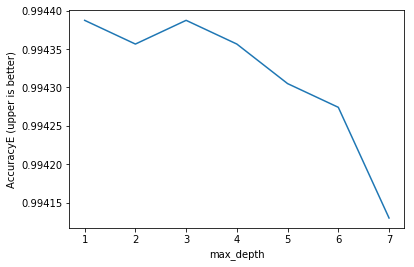

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, accuracys)
plt.xlabel('max_depth')
plt.ylabel('AccuracyE (upper is better)')

In [16]:
salid=pd.DataFrame(salid,columns=['accuracy','depth'])

In [17]:
salid[salid.iloc[:,1]==max(salid.iloc[:,1])]

,accuracy,depth
6,0.99413,7


## Ajustando arbol:

In [18]:
treeclf = DecisionTreeClassifier(max_depth=7, random_state=1)
treeclf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [19]:
y_pred=treeclf.predict(X_test)

In [20]:
print(metrics.accuracy_score(Y_test, y_pred)) #ACCURACY
print(metrics.f1_score(Y_test, y_pred)) #F1-SCORE
print(metrics.fbeta_score(Y_test, y_pred, beta=10)) #F_BETA-SCORE

0.9940168681067832
0.07434944237918215
0.04118414614255423


## Ajustando random forest:

In [21]:
clf = RandomForestClassifier()
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
import warnings
warnings.filterwarnings("ignore")
pd.Series(cross_val_score(clf, X_train, Y_train, cv=10,scoring='accuracy')).describe() ##evaluando modelo con parametros por defecto

count    10.000000
mean      0.994233
std       0.000217
min       0.994027
25%       0.994027
50%       0.994181
75%       0.994413
max       0.994542
dtype: float64

### Tuning n_estimators

In [23]:
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []
salid=[]

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    acc = cross_val_score(clf, X_train, Y_train, cv=3, scoring='accuracy')
    tupla=(np.mean(acc),estimator)
    salid.append(tupla)
    accuracy_scores.append(np.mean(acc))
    print(estimator)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300


Text(0, 0.5, 'Accuracy')

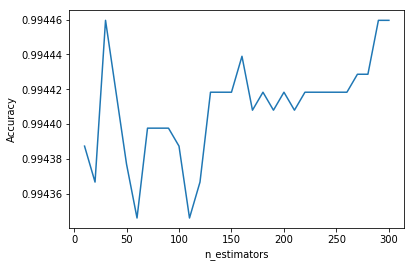

In [24]:
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [25]:
salid=pd.DataFrame(salid,columns=['accuracy','estimator'])

In [26]:
salid[salid.iloc[:,1]==max(salid.iloc[:,1])]

,accuracy,estimator
29,0.99446,300


### Tuning max_features

In [27]:
# list to store the average Accuracy for each value of max_features
accuracy_scores = []
salid=[]
#print(range(X_train.shape[1]1))

#for feature in range(1,X_train.shape[1],1):
#    print(feature)

for feature in range(1,(X_train.shape[1]+1)):
    clf = RandomForestClassifier(n_estimators=300, max_features=feature, random_state=1, n_jobs=-1)
    acc = cross_val_score(clf, X_train, Y_train, cv=2, scoring='accuracy')
    tupla=(np.mean(acc),feature)
    salid.append(tupla)
    accuracy_scores.append(np.mean(acc))
    print(feature)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


Text(0, 0.5, 'Accuracy')

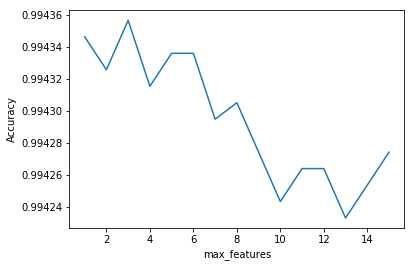

In [28]:
plt.plot(range(1,(X_train.shape[1]+1)), accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

In [29]:
salid=pd.DataFrame(salid,columns=['accuracy','max_feature'])

In [30]:
print(salid[salid.iloc[:,0]==max(salid.iloc[:,0])])
#salid

   accuracy  max_feature
2  0.994357            3


## Ajustando random forest:

In [31]:
# max_features=6 is best and n_estimators=200 is sufficiently large
clf = RandomForestClassifier(n_estimators=300, max_features=3, random_state=1, n_jobs=-1)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [32]:
y_pred=clf.predict(X_test)

In [33]:
print(metrics.accuracy_score(Y_test, y_pred)) #ACCURACY
print(metrics.f1_score(Y_test, y_pred)) #F1-SCORE
print(metrics.fbeta_score(Y_test, y_pred, beta=10)) #F_BETA-SCORE

0.9941610399596319
0.13523131672597866
0.07821160743397457


# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [31]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(X_train)

In [32]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [33]:
def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

#plot_two_classes(x_vis, y)

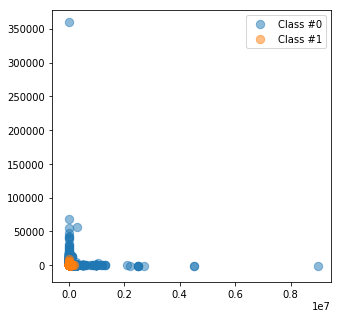

In [34]:
plot_two_classes(x_vis, Y_train, size=(5, 5))

Target percentage 0.1
y.shape =  5497 y.mean() =  0.100418410041841


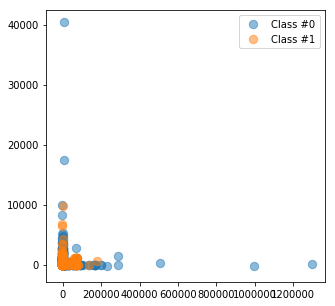

Target percentage 0.2
y.shape =  2755 y.mean() =  0.20036297640653358


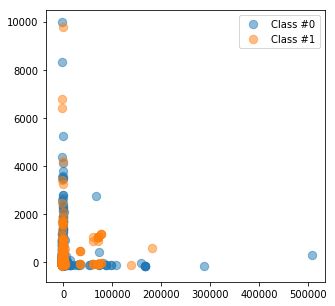

Target percentage 0.3
y.shape =  1790 y.mean() =  0.30837988826815643


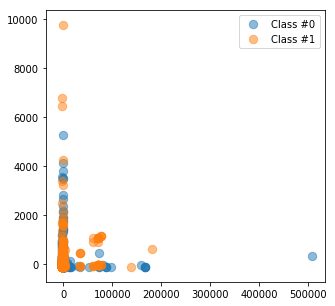

Target percentage 0.4
y.shape =  1333 y.mean() =  0.41410352588147037


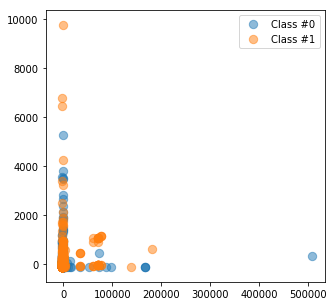

Target percentage 0.5
y.shape =  1079 y.mean() =  0.5115848007414272


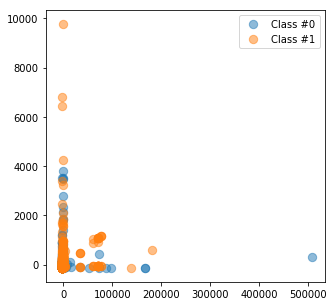

In [35]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(x_vis, Y_train, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()  

## Ajustando los modelos para cada target_percentage:

In [286]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(X_train, Y_train, target_percentage,1)
    
    print('TARGET_PERCENTAGE')
    print(target_percentage)
    
    ######
    logreg = LogisticRegression(solver='lbfgs',max_iter =200) #cambio en parametros para lograr convergencia.
    logreg.fit(X_u, y_u)
    y_pred=logreg.predict(X_test)
    print(metrics.accuracy_score(Y_test, y_pred)) #ACCURACY
    print(metrics.f1_score(Y_test, y_pred)) #F1-SCORE
    print(metrics.fbeta_score(Y_test, y_pred, beta=10)) #F_BETA-SCORE
    ######
    
    print('222222')
    
    ######
    treeclf = DecisionTreeClassifier(max_depth=7, random_state=1)
    treeclf.fit(X_u, y_u)
    y_pred=treeclf.predict(X_test)
    print(metrics.accuracy_score(Y_test, y_pred)) #ACCURACY
    print(metrics.f1_score(Y_test, y_pred)) #F1-SCORE
    print(metrics.fbeta_score(Y_test, y_pred, beta=10)) #F_BETA-SCORE
    ######
    
    
    print('33333')
    
    ######
    clf = RandomForestClassifier(n_estimators=300, max_features=3, random_state=1, n_jobs=-1)
    clf.fit(X_u, y_u)
    y_pred=clf.predict(X_test)
    print(metrics.accuracy_score(Y_test, y_pred)) #ACCURACY
    print(metrics.f1_score(Y_test, y_pred)) #F1-SCORE
    print(metrics.fbeta_score(Y_test, y_pred, beta=10)) #F_BETA-SCORE
    ######
    
    
    #print(y_u.sum()/y_u.shape[0])

TARGET_PERCENTAGE
0.1
0.9924309777254487
0.0
0.0
222222
0.9758271860057188
0.11287477954144623
0.25459844814683524
33333
0.9864959031165149
0.21727019498607242
0.31546069755335765
TARGET_PERCENTAGE
0.2
0.9830357786481486
0.027548209366391185
0.04043072735278811
222222
0.952951918687075
0.08075117370892018
0.32920219821868485
33333
0.9596559098445346
0.1158504476040021
0.4247916188728301
TARGET_PERCENTAGE
0.3
0.9649902683999327
0.0344599072233267
0.10192516689954975
222222
0.8567892928370617
0.04487179487179487
0.4636825709132644
33333


/Users/juand./anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9059759233005743
0.06544064962980654
0.48649883974404057
TARGET_PERCENTAGE
0.4
0.8974217266982243
0.033069082672706675
0.25716777118939654
222222
0.8343465410769637
0.041168289290681497
0.47536969311496263
33333


/Users/juand./anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8441021697863854
0.046723479282985605
0.51701490615241
TARGET_PERCENTAGE
0.5
0.39003291923973377
0.017113873078561194
0.4456890699253224
222222
0.7648076507196578
0.02993062438057483
0.4440529917018488
33333


/Users/juand./anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7628613307062018
0.03481662591687042
0.5214037122969838


# Exercise 15.3

Same analysis using random-over-sampling

In [36]:
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0] #numero total de muestras
    n_samples_0 = (y == 0).sum() #numero total de ceros (mayoritaria)
    n_samples_1 = (y == 1).sum() #numero total de unos (minoritaria)

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1) 
    #numero de muestras a seleccionar de la minoritaria

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new)) #muestras de la minoritaria
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_] 
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X.iloc[filter_], y.iloc[filter_]

Target percentage 0.1
y.shape =  107280 y.mean() =  0.1


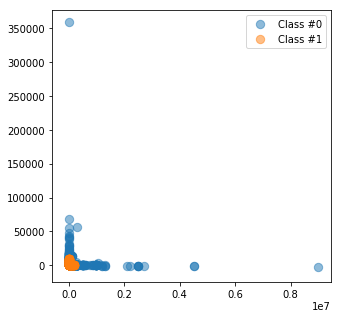

Target percentage 0.2
y.shape =  120690 y.mean() =  0.2


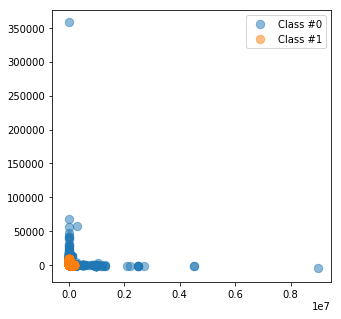

Target percentage 0.3
y.shape =  137931 y.mean() =  0.29999782499945626


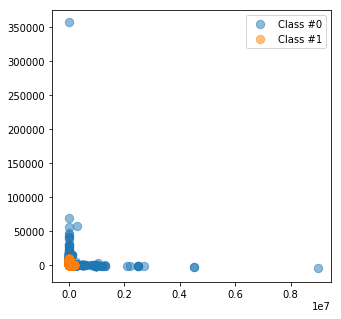

Target percentage 0.4
y.shape =  160920 y.mean() =  0.4


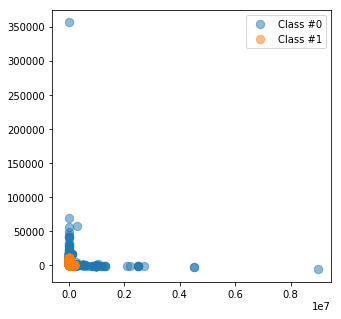

Target percentage 0.5
y.shape =  193104 y.mean() =  0.5


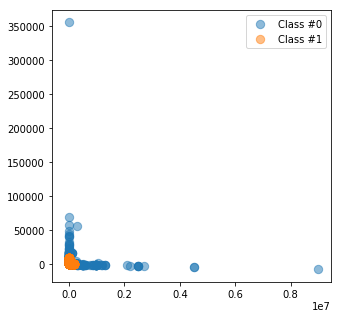

In [288]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(X_train, Y_train, target_percentage, 1)
    # Instanciate a PCA object for the sake of easy visualisation
    pca = PCA(n_components = 2)
    # Fit and transform x to visualise inside a 2D feature space
    x_vis = pca.fit_transform(X_u)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(x_vis, y_u, size=(5, 5))
    plt.show()  

In [289]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(X_train, Y_train, target_percentage,1)
    
    print('TARGET_PERCENTAGE')
    print(target_percentage)
    print(y_u.mean())
    
    ######
    logreg = LogisticRegression(solver='lbfgs',max_iter =200) #cambio en parametros para lograr convergencia.
    logreg.fit(X_u, y_u)
    y_pred=logreg.predict(X_test)
    print(metrics.accuracy_score(Y_test, y_pred)) #ACCURACY
    print(metrics.f1_score(Y_test, y_pred)) #F1-SCORE
    print(metrics.fbeta_score(Y_test, y_pred, beta=10)) #F_BETA-SCORE
    ######
    
    print('222222')
    
    ######
    treeclf = DecisionTreeClassifier(max_depth=7, random_state=1)
    treeclf.fit(X_u, y_u)
    y_pred=treeclf.predict(X_test)
    print(metrics.accuracy_score(Y_test, y_pred)) #ACCURACY
    print(metrics.f1_score(Y_test, y_pred)) #F1-SCORE
    print(metrics.fbeta_score(Y_test, y_pred, beta=10)) #F_BETA-SCORE
    ######
    
    
    print('33333')
    
    ######
    clf = RandomForestClassifier(n_estimators=300, max_features=3, random_state=1, n_jobs=-1)
    clf.fit(X_u, y_u)
    y_pred=clf.predict(X_test)
    print(metrics.accuracy_score(Y_test, y_pred)) #ACCURACY
    print(metrics.f1_score(Y_test, y_pred)) #F1-SCORE
    print(metrics.fbeta_score(Y_test, y_pred, beta=10)) #F_BETA-SCORE
    ######
    
    
    #print(y_u.sum()/y_u.shape[0])

TARGET_PERCENTAGE
0.1
0.1
0.9935843525482375
0.0
0.0
222222
0.9872888483071821
0.1589825119236884
0.20294164925253178
33333
0.9938006103275104
0.17834394904458598
0.11510439985347388
TARGET_PERCENTAGE
0.2
0.2
0.9905807722805584
0.010101010101010102
0.00819439373656241
222222
0.9528798327606507
0.08321645628798505
0.3405698264757142
33333
0.9937044957589447
0.16025641025641024
0.10278015223674035
TARGET_PERCENTAGE
0.3
0.29999782499945626


/Users/juand./anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9773169618184876
0.03476482617586912
0.0680458130226291
222222
0.9334646899103731
0.07792207792207793
0.43352410301562844
33333
0.993728524401086
0.17142857142857143
0.11098901098901098
TARGET_PERCENTAGE
0.4
0.4


/Users/juand./anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9001609919023476
0.033046311380032584
0.2511557859344353
222222
0.8789437008914627
0.05193827625141136
0.4713720450471778
33333
0.9938486676117932
0.1688311688311688
0.10690876521597527
TARGET_PERCENTAGE
0.5
0.5
0.6494941970829229
0.020678079892581407
0.3972924648786717
222222
0.791815844486628
0.03518930957683742
0.4801564615616067
33333
0.9938246389696518
0.15737704918032785
0.09869706840390881


# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [41]:
pca = PCA(n_components = 2)
X_train_a = X_train
X_train_a = pca.fit_transform(X_train_a)

In [42]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum() #numero total de unos (minoritaria)

    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X_train.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1].iloc[sel] - step * (X[y==1].iloc[sel] - X[y==1].iloc[nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

In [43]:
def SMOTE_(X, y, target_percentage=0.5, k=5, seed=None):
    
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum() #numero total de unos (minoritaria)


 
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X_train_a.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

Target percentage 0.25 k  5
y.shape =  128736 y.mean() =  0.25


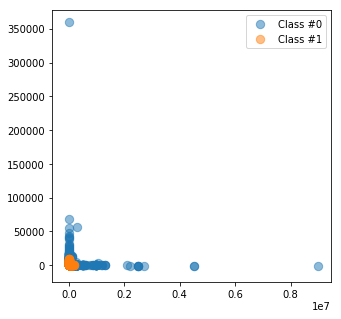

Random Forest  0.25 Media:  0.25 Tamaño:  128736
Accuracy:  0.99
F1_Score :  0.13
F_BETA-SCORE:  0.08
Decision Tree  0.25 Media:  0.25 Tamaño:  128736
Accuracy:  0.98
F1_Score :  0.02
F_BETA-SCORE:  0.04
Logistic  0.25 Media:  0.25 Tamaño:  128736
Accuracy:  0.98
F1_Score :  0.02
F_BETA-SCORE:  0.03
Target percentage 0.25 k  15
y.shape =  128736 y.mean() =  0.25


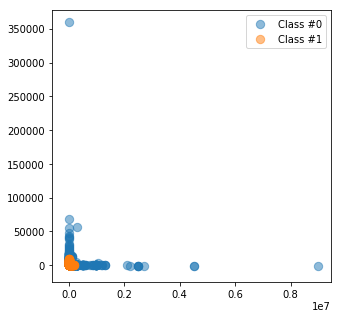

Random Forest  0.25 Media:  0.25 Tamaño:  128736
Accuracy:  0.99
F1_Score :  0.16
F_BETA-SCORE:  0.11
Decision Tree  0.25 Media:  0.25 Tamaño:  128736
Accuracy:  0.99
F1_Score :  0.09
F_BETA-SCORE:  0.12
Logistic  0.25 Media:  0.25 Tamaño:  128736
Accuracy:  0.98
F1_Score :  0.03
F_BETA-SCORE:  0.07
Target percentage 0.5 k  5
y.shape =  193104 y.mean() =  0.5


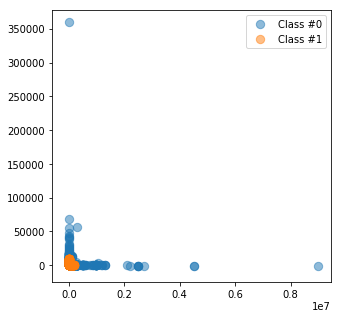

/Users/juand./anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Random Forest  0.5 Media:  0.5 Tamaño:  193104
Accuracy:  0.99
F1_Score :  0.12
F_BETA-SCORE:  0.08
Decision Tree  0.5 Media:  0.5 Tamaño:  193104
Accuracy:  0.95
F1_Score :  0.02
F_BETA-SCORE:  0.08
Logistic  0.5 Media:  0.5 Tamaño:  193104
Accuracy:  0.63
F1_Score :  0.02
F_BETA-SCORE:  0.32
Target percentage 0.5 k  15
y.shape =  193104 y.mean() =  0.5


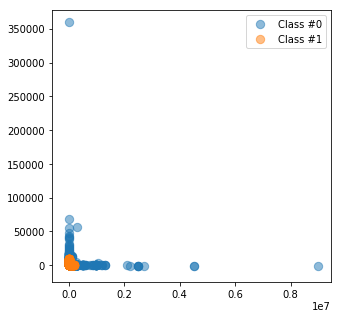

/Users/juand./anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Random Forest  0.5 Media:  0.5 Tamaño:  193104
Accuracy:  0.99
F1_Score :  0.18
F_BETA-SCORE:  0.13
Decision Tree  0.5 Media:  0.5 Tamaño:  193104
Accuracy:  0.84
F1_Score :  0.02
F_BETA-SCORE:  0.28
Logistic  0.5 Media:  0.5 Tamaño:  193104
Accuracy:  0.64
F1_Score :  0.02
F_BETA-SCORE:  0.38


In [49]:
for target_percentage in [0.25, 0.5]:
    for k in [5, 15]:
        X_u, y_u = SMOTE(X_train, Y_train, target_percentage, k, seed=3)
        X_u_a, y_u_a = SMOTE_(X_train_a, Y_train, target_percentage, k, seed=3)
        print('Target percentage', target_percentage, 'k ', k)
        print('y.shape = ',y_u_a.shape[0], 'y.mean() = ', y_u_a.mean())
        plot_two_classes(X_u_a, y_u_a, size=(5, 5))
        plt.show()    
        rfc = RandomForestClassifier(n_estimators=300,max_features=3 , random_state=1, n_jobs=-1)
        treeclf = DecisionTreeClassifier(max_depth=7, random_state=1)
        logreg = LogisticRegression(solver='lbfgs',max_iter =200) #cambio en parametros para lograr convergencia.
        treeclf.fit(X_u, y_u)
        rfc.fit(X_u, y_u)
        logreg.fit(X_u, y_u)
        y_pred=rfc.predict(X_test)
        y_pred_a = treeclf.predict(X_test)
        y_pred_b = logreg.predict(X_test)
        print('Random Forest ',target_percentage, 'Media: ',round(y_u.mean(),2), 'Tamaño: ',y_u.shape[0])
        print('Accuracy: ',round(metrics.accuracy_score(Y_test, y_pred),2)) #ACCURACY
        print('F1_Score : ',round(metrics.f1_score(Y_test, y_pred),2)) #F1-SCORE
        print('F_BETA-SCORE: ',round(metrics.fbeta_score(Y_test, y_pred, beta=10),2)) #F_BETA-SCORE
        print('Decision Tree ',target_percentage,'Media: ',round(y_u.mean(),2), 'Tamaño: ',y_u.shape[0])
        print('Accuracy: ',round(metrics.accuracy_score(Y_test, y_pred_a),2)) #ACCURACY
        print('F1_Score : ',round(metrics.f1_score(Y_test, y_pred_a),2)) #F1-SCORE
        print('F_BETA-SCORE: ',round(metrics.fbeta_score(Y_test, y_pred_a, beta=10),2)) #F_BETA-SCORE
        print('Logistic ',target_percentage, 'Media: ',round(y_u.mean(),2), 'Tamaño: ',y_u.shape[0])
        print('Accuracy: ',round(metrics.accuracy_score(Y_test, y_pred_b),2)) #ACCURACY
        print('F1_Score : ',round(metrics.f1_score(Y_test, y_pred_b),2)) #F1-SCORE
        print('F_BETA-SCORE: ',round(metrics.fbeta_score(Y_test, y_pred_b, beta=10),2)) #F_BETA-SCORE

# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [50]:
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE

In [51]:
ada = ADASYN()
X_u, y_u = ada.fit_resample(X_train, Y_train)

In [52]:
y_u.mean()

0.4995412772706775

In [53]:
    ada = ADASYN(random_state=42)
    X_u, y_u = ada.fit_resample(X_train, Y_train)
    
    print('TARGET_PERCENTAGE')
    print(target_percentage)
    print(y_u.mean())
    
    ######
    logreg = LogisticRegression(solver='lbfgs',max_iter =200) #cambio en parametros para lograr convergencia.
    logreg.fit(X_u, y_u)
    y_pred=logreg.predict(X_test)
    print(metrics.accuracy_score(Y_test, y_pred)) #ACCURACY
    print(metrics.f1_score(Y_test, y_pred)) #F1-SCORE
    print(metrics.fbeta_score(Y_test, y_pred, beta=10)) #F_BETA-SCORE
    ######
    
    print('222222')
    
    ######
    treeclf = DecisionTreeClassifier(max_depth=7, random_state=1)
    treeclf.fit(X_u, y_u)
    y_pred=treeclf.predict(X_test)
    print(metrics.accuracy_score(Y_test, y_pred)) #ACCURACY
    print(metrics.f1_score(Y_test, y_pred)) #F1-SCORE
    print(metrics.fbeta_score(Y_test, y_pred, beta=10)) #F_BETA-SCORE
    ######
    
    
    print('33333')
    
    ######
    clf = RandomForestClassifier(n_estimators=300, max_features=3, random_state=1, n_jobs=-1)
    clf.fit(X_u, y_u)
    y_pred=clf.predict(X_test)
    print(metrics.accuracy_score(Y_test, y_pred)) #ACCURACY
    print(metrics.f1_score(Y_test, y_pred)) #F1-SCORE
    print(metrics.fbeta_score(Y_test, y_pred, beta=10)) #F_BETA-SCORE
    ######
    
    
    #print(y_u.sum()/y_u.shape[0])

TARGET_PERCENTAGE
0.5
0.4995412772706775
0.31672153206622294
0.01591915836101883
0.4370566875505635
222222
0.7840065357906625
0.027900940845679678
0.3889021550952182
33333
0.9929115505682774
0.17827298050139276
0.1313073860404648


# Exercise 15.6 (3 points)

Compare and comment about the results

## Fijando el porcentaje de balanceo en 50%, los resultados que se obtienen se enceuntran en la siguiente tabla.

<img src="resultsE15.png">

## En la tabla se observa que los Acuraccys más altos corresponden al algoritmo Random Forest con Over Sampling, Smote, y ADASYN. Adicionalmente los f1 Score, en general son cercanos a cero, sin embargo, para el random forest tienden a aumentar respecto a los demas.